# Исследовательский анализ компьютерных игр

Заказчик исследования — интернет-магазин «Стримчик».

**Цель исследования** — Выявление закономерностей, определяющих успешность игры.

Для этого нужно проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Результаты исследования будут учтены при планировании рекламных кампаний.

**Ход исследования**

Входные данные:

 - исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы;
 - данные за 2016 год могут быть неполными.

Перед проверкой гипотез понадобится обзор данных для проверки их качества.

Данные будут проверены на ошибки, а также будет дана оценка их влияния на исследование. 
Затем, на этапе предобработки будет рассмотрена возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:

 1. Обзор данных.
 2. Предобработка данных и дополнительные расчеты.
 3. Анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.

<a id="start1"></a>
### Start

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('games.csv') # Локальный путь
except:  
    df = pd.read_csv('/datasets/games.csv')  
    
# 2 знака после точки для формата float    
pd.options.display.float_format ='{:,.2f}'.format 

# вывод на экран всех столбцов
pd.set_option('display.max_columns', 500)

**Информация о пользователях**

Вывожу на экран первые десять строк таблицы `games`:

In [3]:
df.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


Получаю общую информацию о таблице:

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице **`games`** одиннадцать столбцов. В столбцах два типа данных — `float64` и `object`.

Согласно документации к данным:

- `Name` — название игры
-`Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Названия колонок не соответствуют стилю написания названий колонок.   
В шести столбцах есть пропущенные значения.
У значений столбцов `Year_of_Release` и `User_Score` неверный тип данных.

**Выводы**

В таблице содержатся данные об играх, жанрах, платформах, годах выпуска, продажах по регионам, оценки пользователей и экспертов.

Названия колонок в таблицах не соответствуют стилю написания названий колонок. 
В некоторых столбцах есть пропущенные значения.  

Для анализа данных и проверки гипотез необходимо изменить написание названий столбцов, изменить типы данных некоторых столбцов, произвести расчеты и добавить новые столбцы.

[в начало](#start1)

## Предобработка данных

### Переименование столбцов

Приведу названия столбцов к общепринятому стилю. Для удобства выведу их на экран.

In [5]:
# вывод названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# изменение названий столбцов
#df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales',
         #     'eu_sales','jp_sales', 'other_sales','critic_score','user_score', 'rating']

In [7]:
# изменение названий столбцов
df.columns = df.columns.str.lower()

Проверю корректное изменение названий столбцов выведением первых пяти строк таблицы.

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


### Работа с пропусками

Посмотрю, сколько в таблице пропущенных значений:

In [9]:
display(df.shape)
df.isna().sum()

(16715, 11)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Причиной пропусков могут быть сбои в выгрузке данных, ошибки при вводе данных, а также в принципе отсутствием тех или иных оценок. В идеале на практике было бы правильно установить причину пропусков и восстановить данные.     
Удалю строки с пропущенными значениями в столбцах `Name` и `Year_of_Release` (они составляют 1.6% от общего количества строк), поскольку для исследования важно знать название игры и год выхода. 

In [10]:
df = df.dropna(subset=['name','year_of_release'])

Посмотрю уникальные значения в остальных столбцах с пропусками.

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посчитаю количество значений 'tbd' в столбце user_score.

In [13]:
df.query("user_score == 'tbd'").shape

(2376, 11)

In [14]:
display(df.shape, df['rating'].unique())
df['rating'].value_counts()

(16444, 11)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В столбце **`critic_score`** наблюдается 100-бальная система оценки, в столбце **`user_score`** - 10-бальная, в столбце **`rating`**  - сокращенные значения возрастных категорий.   

В столбце **`user_score`** помимо пропусков присутствует значение *'tbd'* . Оно составляет 14.5 % от всех значений  столбца **`user_score`**. TBD - это аббревиатура от английского To Be Determined (будет определено). Она применяется, если какая-то информация еще не определена. В нашем случае, вероятно, речь идет о том, что данные о рейтинге со стороны пользователей еще не получены/не обработаны.    

Пропущенные данные в рассматриваемых столбцах оставлю незаполненными. Значения рейтингов должны быть реальными, а не предполагаемыми, поскольку их влияние на продажи будет анализироваться в процессе исследования.

Значение *'tbd'* в столбце **`user_score`** заменю на NaN, поскольку оценки в принципе еще нет. Сделаю это в следующем п.2.3 при изменении типа данных на десятичный.  

В столбце **`rating`** несколько рейтингов встречаются крайне редко: EC, K-A, RP и AO. Они составляют 0.079%. Также в этом столбце очень много пропущенных значений (около 41% ). Поскольку в дальнейшем необходимо будет проанализировать влияние рейтинга ESRB на продажи, присвою пропущенным и крайне редко встречающимся значениям значение "missing".

Заполню пропущенные значения в столбце **`rating`**

In [15]:
# заполнение пропущенных значений
df['rating'] = df['rating'].fillna('missing')

Заменю крайне редко встречающиеся значения в столбце **`rating`** значением "missing".

In [16]:
# замена значений
indexes = { 
    'EC': 'missing',
    'K-A': 'missing',
    'RP': 'missing',
    'AO': 'missing',
}
df = df.replace({ 'rating': indexes })

Проверю заполнение пропусков и замену значений.

In [17]:
display(df['rating'].unique())
df['rating'].value_counts()

array(['E', 'missing', 'M', 'T', 'E10+'], dtype=object)

missing    6689
E          3921
T          2905
M          1536
E10+       1393
Name: rating, dtype: int64

Проверю удаление строк в столбцах `Name` и `Year_of_Release`.

In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Изменение типа данных

В столбце **`year_of_release`** изменю тип данных на целочисленный, т.к. в этом столбце указано значение года.   

In [19]:
# изменение типа данных
df['year_of_release'] = df['year_of_release'].astype('int32')

В столбце **`user_score`** изменю тип данных на десятичный, т.к. в этом столбце встречаются десятичные значения. При этом в ячейках со значением `tbd` образуется пропуск.

In [20]:
# изменение типа данных на десятичный
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Проверю изменение типа данных.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Типы данных изменились, заполненных значений в столбце **`user_score`** стало меньше (7463), чем было изначально (10014) по причине изменения значения *`tbd`* на пропуск.

### Дубликаты

Проверю наличие дубликатов.

In [22]:
df.duplicated().sum()

0

**Выводы**

Изменены все названия столбцов.  
Удалены строки с пропущенными значениями в двух столбцах.  
Изменены типы данных в трех столбцах, заменено значение *`tbd`* на пропуск.  
Пропущенные и редко встречающиеся значения в столбце **`rating`** заменены на значение `missing`.

### Расчеты и добавление результатов в таблицу.

#### Столбец со значением месяца.

Добавлю в таблицу столбец **`sales`** с общей суммой продаж, которую рассчитаю, сложив продажи по всем регионам. 

In [23]:
# расчет значения нового столбца
df['sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

Проверю создание столбца.

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,missing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,missing,31.38


**Выводы**

Создан столбец **`sales`** с общей суммой продаж.

[в начало](#start1)

## Анализ данных

### Количество игр по годам

Посмотрю, сколько игр выпускалось в разные годы.

In [25]:
# группировка количества игр по годам
game_year = df.groupby('year_of_release')['name'].count()
game_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

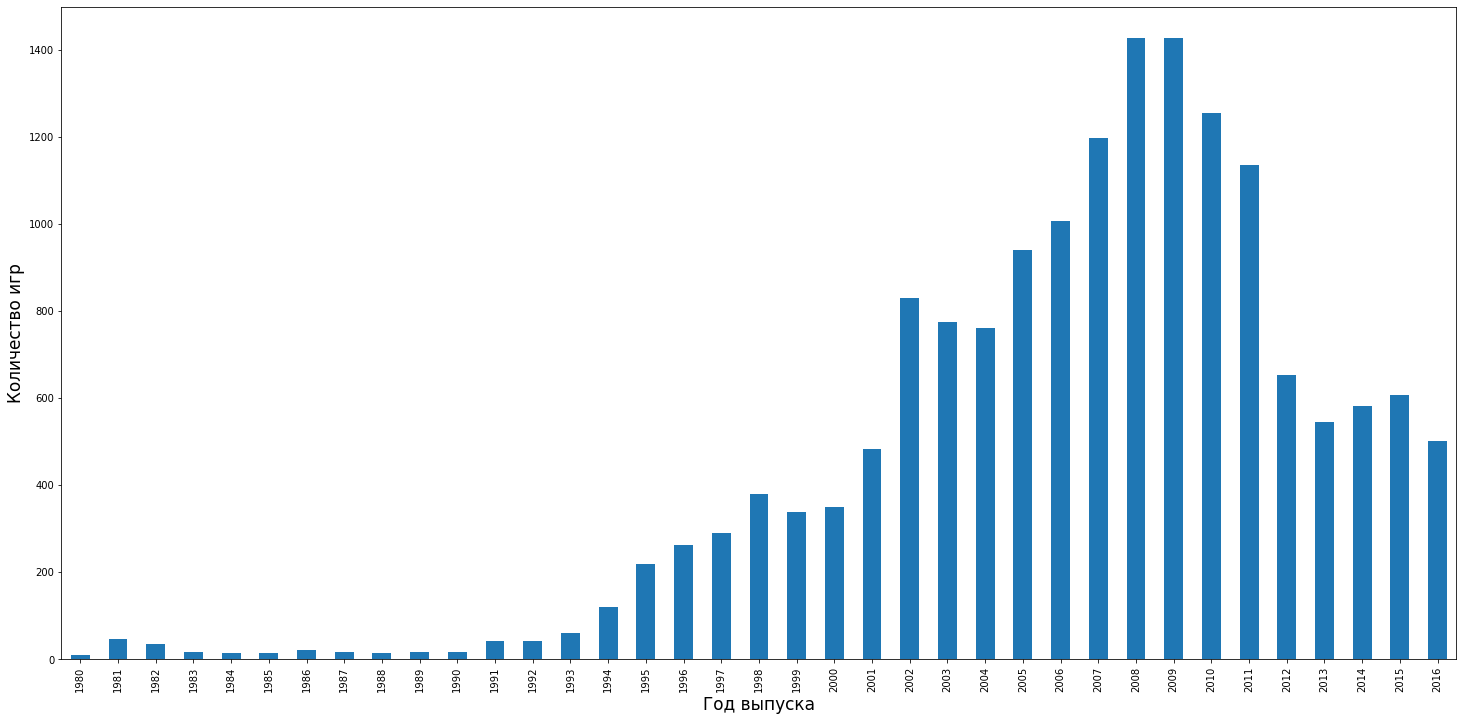

In [26]:
# построение гистограммы
game_year.plot(x='year_of_release', kind= 'bar', figsize = (25,12))
plt.xlabel('Год выпуска', fontsize=17)
plt.ylabel('Количество игр',fontsize=17);

Отчетливо виден рост количества выпускаемых игр с 1994 года. Пик пришелся на 2008 и 2009 годы, затем начался  спад. Больше всего игр выпускалось с 2002 по 2011 годы. В 2012 году и позднее стало выпускаться в 2 раза меньше игр по сравнению с периодом активного производства игр. Можно предположить, что отчасти спад связан с более активным использованием смартфонов.

### Суммарные продажи по платформам

Посмотрю, как менялись продажи по платформам. Сгруппирую платформы по суммарным продажам.

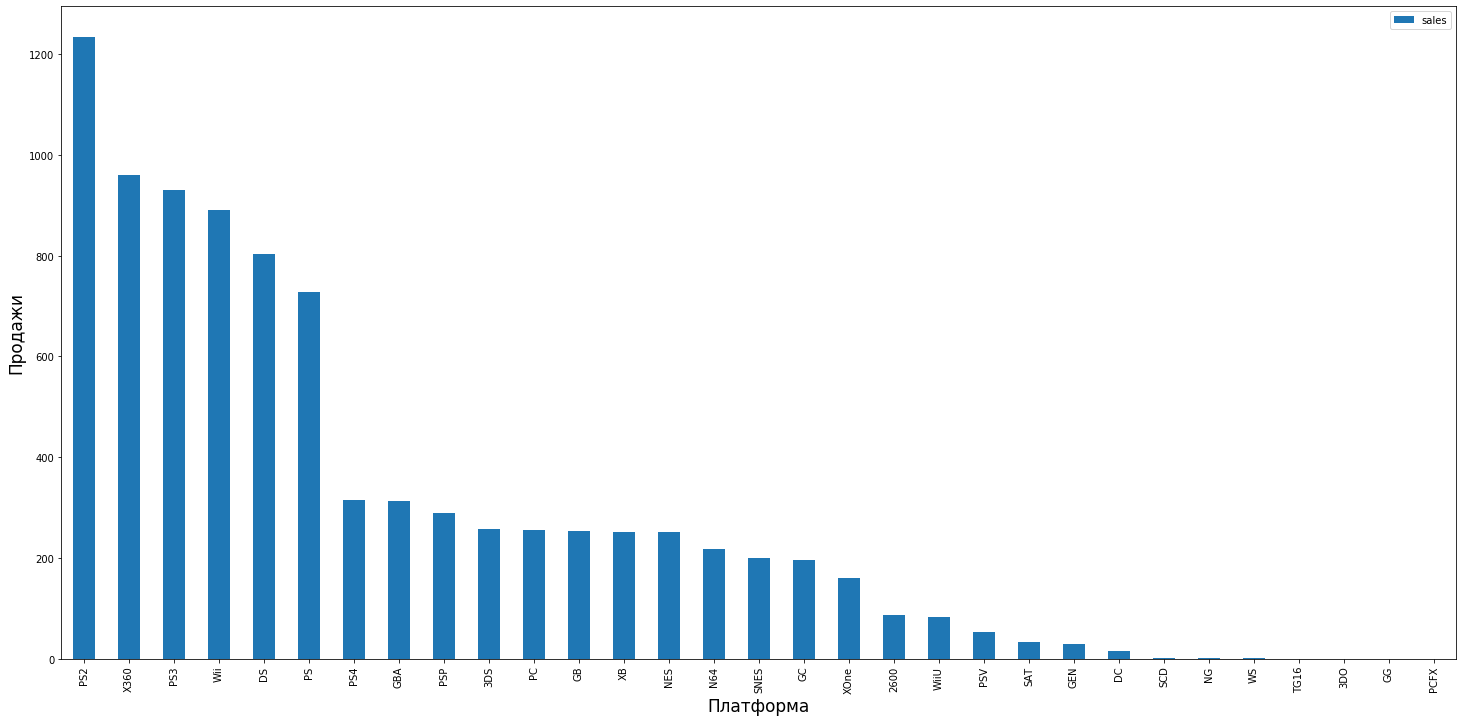

In [27]:
# группировка платформ по суммарным продажам и построение гистограммы
platform = df.groupby('platform')['sales'].sum().sort_values(ascending = False).reset_index()
platform.plot(x='platform', kind= 'bar', figsize = (25,12))
plt.xlabel('Платформа', fontsize=17)
plt.ylabel('Продажи',fontsize=17);

Изучу ТОП6 платформ - лидеров по продажам (более 500 млн.проданных копий). Сохраню список с названиями платформ в отдельную переменную.

In [28]:
# сохранение в виде списка первые шесть по продажам платформ
platforms_top_list = platform['platform'].head(6).unique()
platforms_top_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

Создам цикл для постоения графиков распределения продаж по каждой из ТОП6 платформ по годам.

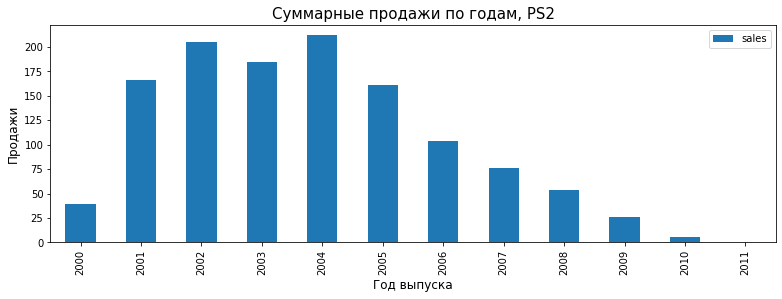

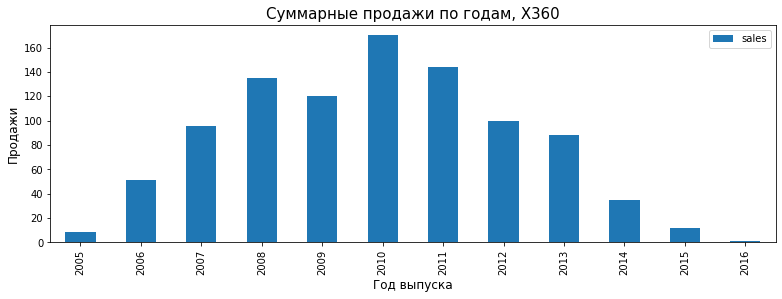

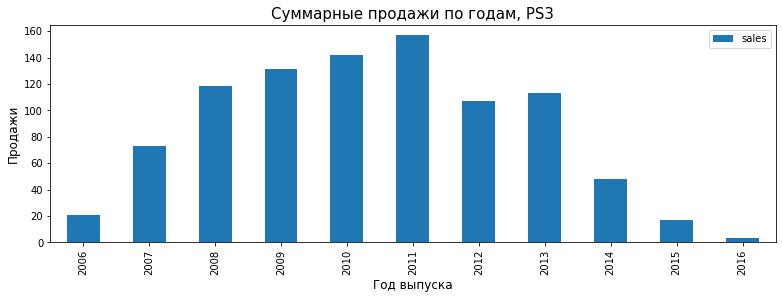

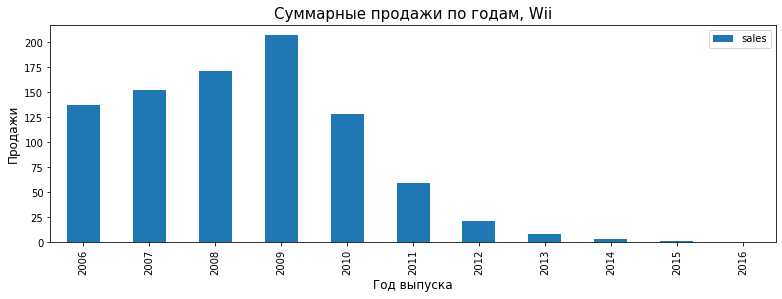

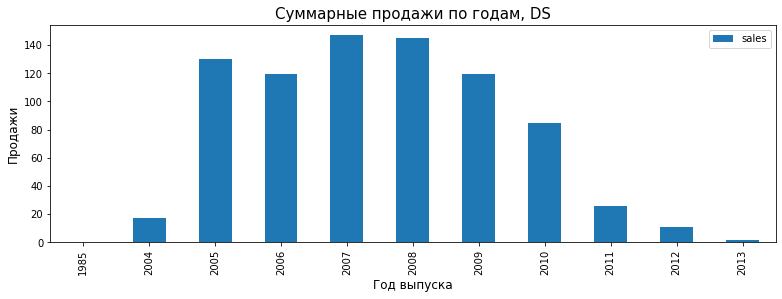

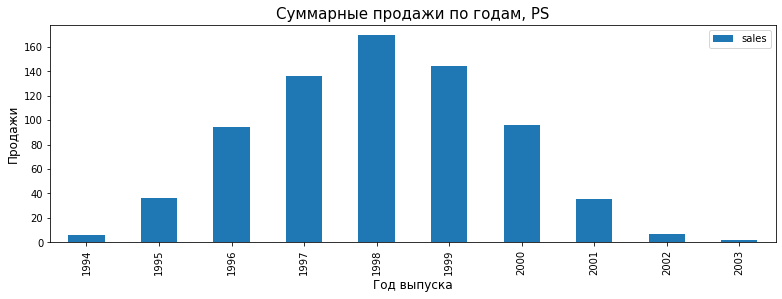

In [29]:
#Создание цикла для построения графиков распределения по годам для каждой платформы
for platform in platforms_top_list:
    df[df['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='sales', 
        aggfunc='sum'
    ).plot(
        kind='bar', 
        figsize=(13,4)
    )
    plt.title(f'Суммарные продажи по годам, {platform}', fontsize=15)
    plt.xlabel('Год выпуска', fontsize=12)
    plt.ylabel('Продажи',fontsize=12);

По построенным гистограммам наблюдается продолжительность существования платформы 10-11 лет. Новые платформы появляются каждые 5-6 лет. Основные продажи игр каждой платформы происходят в течение 5-6 лет существования платформы, чаще ближе к середине жизненного цикла.

### Определение актуального периода

Возьму срок 5 лет в качестве актуального периода. Именно в последние 5 лет продажи игр находятся на уровне значительно более низком, чем в 2011 году и ранее. Эти данные помогут построить прогноз на 2017 год.

In [30]:
df_forecast = df[df['year_of_release'] >= 2012]
df_forecast

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,missing,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,missing,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,missing,0.01


### Лидеры по продажам

Cгруппирую платформы по суммарным продажам.

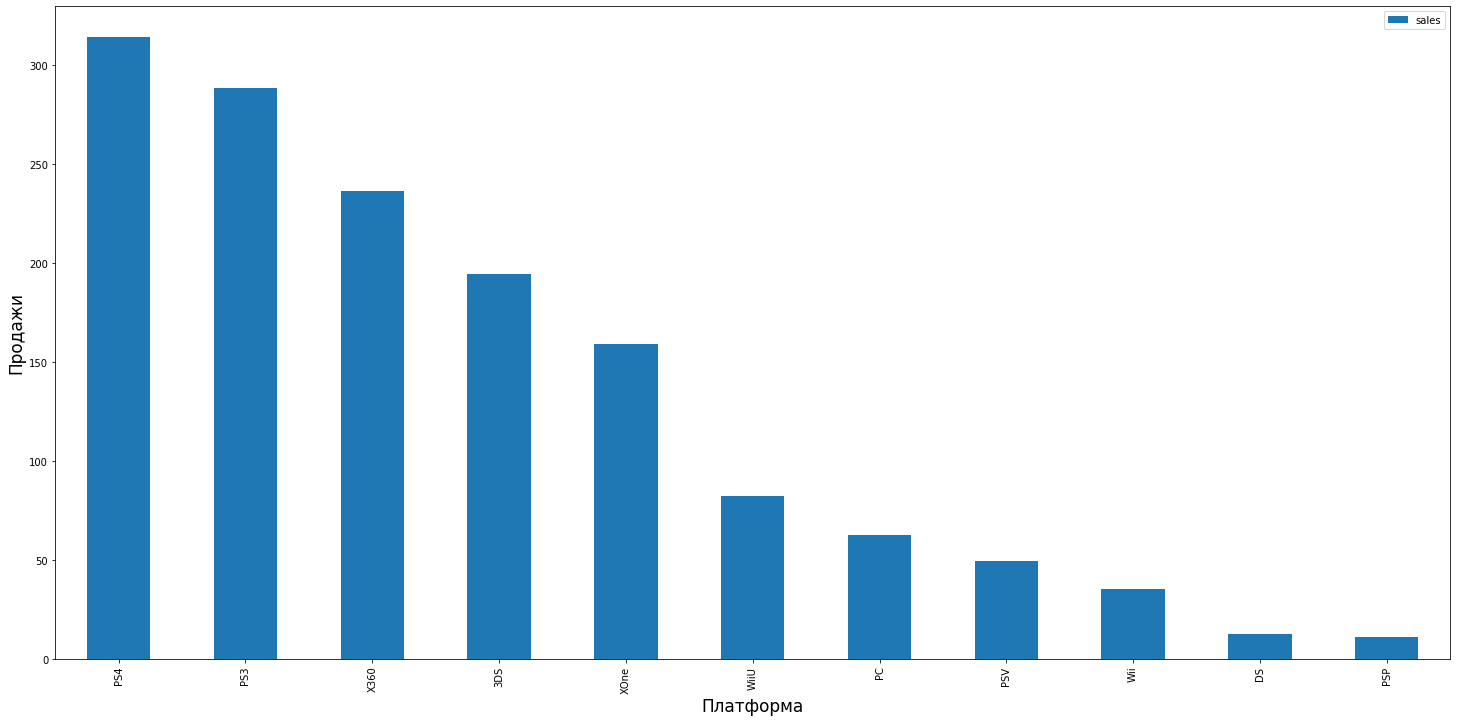

In [31]:
platform_forecast = df_forecast.groupby('platform')['sales'].sum().\
sort_values(ascending = False).reset_index().\
plot(x='platform', kind= 'bar', figsize = (25,12))
plt.xlabel('Платформа', fontsize=17)
plt.ylabel('Продажи',fontsize=17)
platform_forecast;

Лидерами по продажам являются платформы: **`PS4`**,**`PS3`** и **`X360`**.   

Посмотрю на графике продажи каждой платформы по годам. Для этого создам сводную таблицу с суммарными продажами и на ее основе построю график.

In [32]:
# создание сводной таблицы
platform_p_t = df_forecast.pivot_table(
    index='year_of_release',
    columns ='platform', 
    values='sales', 
    aggfunc='sum')
platform_p_t

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,nan,7.69,16.19,21.71,17.56,99.74,nan
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,nan,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,nan,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,nan,5.25,3.60,69.25,nan,4.25,0.18,4.60,1.52,26.15


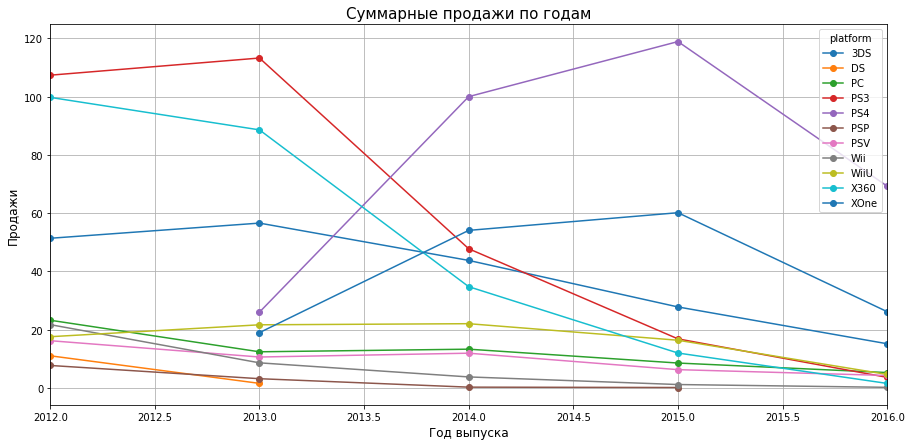

In [33]:
# построение графика
platform_p_t.plot(grid=True, figsize=(15,7), style='o-')
plt.title('Суммарные продажи по годам', fontsize=15)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Отчетливо видно, что две из одиннадцати платформ в 2014 - 2016 годах заметно лидировали по суммарным продажам - это **PS4** и **XOne**. По остальным платформам наблюдается спад продаж к 2015 году, две из них прекратили продажи игр в актуальном периоде. Старт продаж платформ-лидеров (**PS4, XOne**) начался в 2013 года, в 2014 и 2015 годах - рост продаж. В 2016 году заметен спад, но, учитывая средний жизненный цикл платформ в 10 лет и тот факт, что за 2016 год данные могут быть неполными (что отразилось на значениях 2016 года), можно смело предположить, что обе платформы только вступают в активный период продаж игр. Соответственно, они являются потенциально прибыльными платформами. Также еще 3 платформы (**WiiU**, **3DS**, **PSV**) находятся на 4-6 годах жизненного цикла, поэтому в следующем 2017 году продолжат приносить прибыль, возможно, чуть меньшую по сравнению с предыдущими годами.

### Диаграммы размаха

Сохраню данные по пяти потенциально прибыльным платформам (**PS4, XOne**, **WiiU**, **3DS**, **PSV**), определенных в п.3.4., в новую переменную.

In [34]:
platform_leaders = df_forecast.query(
    'platform=="PS4" or \
    platform=="XOne" or \
    platform=="WiiU" or \
    platform=="3DS" or \
    platform=="PSV"'
    )
platform_leaders

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,missing,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,missing,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,nan,nan,missing,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.20,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,nan,nan,missing,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,missing,0.01


Посмотрю статистические данные по продажам на платформах.

In [35]:
platform_leaders.groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.00,0.49,1.39,0.01,0.04,0.11,0.31,14.60
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSV,411.00,0.12,0.20,0.01,0.02,0.05,0.12,1.96
WiiU,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


Построю диаграммы размаха для пяти потенциально прибыльных платформ с ограничением по оси y для наглядности.

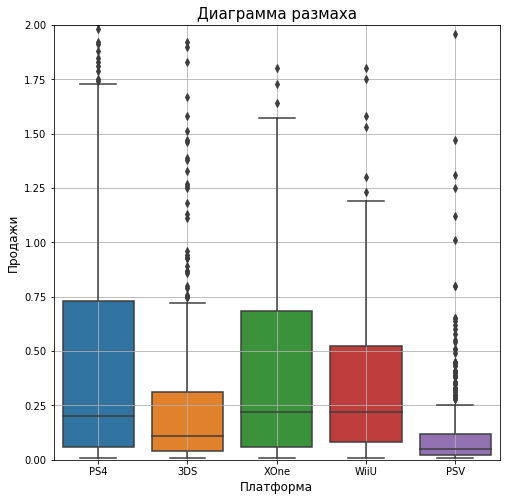

In [36]:
# построение диаграммы размаха
plt.figure(figsize=(8,8))
sns.boxplot(data=platform_leaders, x=platform_leaders['platform'], y='sales')
plt.ylim(0, 2)
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid();

Построю диаграммы размаха для пяти потенциально прибыльных платформ без урезанных данных.

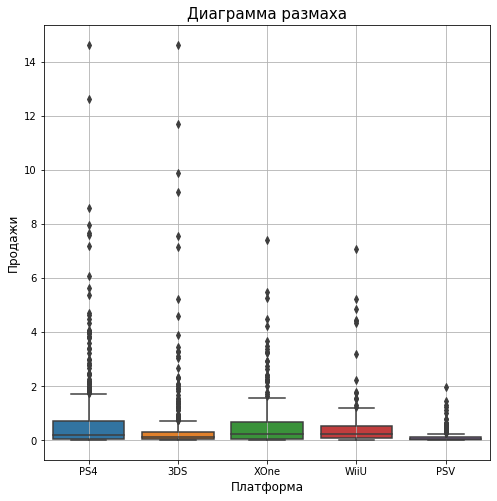

In [37]:
# построение диаграммы размаха
plt.figure(figsize=(8,8))
sns.boxplot(data=platform_leaders, x=platform_leaders['platform'], y='sales')
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid();

У платформ PS4 и 3DS заметны выбросы с очень высокими значениями продаж, у платформ XOne и WiiU они ниже, но все же высокие.Также присутствуют выбросы у платформы PSV. Это объясняется тем, что некоторые игры, выпущенные для указанных платформ, были мегаполулярны и очень хорошо продавались.

Объемы продаж выше на популярных платформах **PS4**, **XOne** и **WiiU**. Их медианные значения находятся практически на одном уровне 0.2-0.22 млн.копий. Медианные значения платформ **3DS** и **PSV** значительно ниже: 0.12 и 0.05 млн.копий соответственно.   
Распределение по продажам по всем платформам очень сильно скошено в бОльшую сторону, расстояние между первым квартилем и медианой значительно меньше, чем расстояние между медианой и третьим квартилем, а средние значения намного больше медианных.

### Влияние отзывов пользователей и критиков на продажи

Проанализирую влияние отзывов пользователей и критиков на продажи игр самой популярной платформы **XOne**. Сохраню в отдельную переменную данные по указанной платформе.

In [38]:
ps4 = platform_leaders.query('platform == "PS4"')

Построю диаграммы рассеяния по продажам в зависимости от оценки:
- критиков
- пользователей.

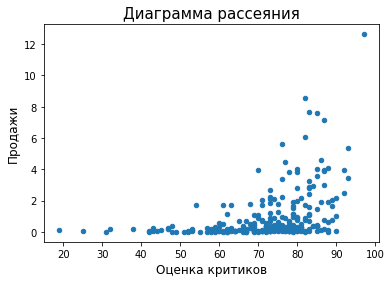

In [39]:
# построение диаграммы рассеяния
ps4.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Наблюдается небольшая зависимость продаж игр от оценки критиков.

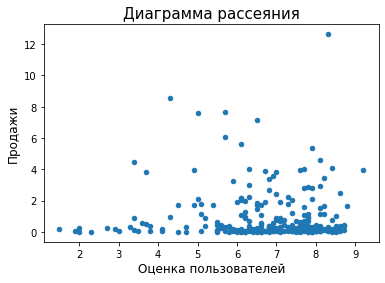

In [40]:
# построение диаграммы рассеяния
ps4.plot(x='user_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Зависимость продаж игр от оценки пользователей отсутствует: при низких и средних оценках встречаются достаточно высокие показатели продаж.  
Рассчитаю коэффициент корреляции между продажами и отзывами:
- критиков
- пользователей.

In [41]:
# расчет коэффициента корреляции 
ps4['sales'].corr(ps4['critic_score'])

0.406567902061781

In [42]:
# расчет коэффициента корреляции 
ps4['sales'].corr(ps4['user_score'])

-0.031957110204556424

Согласно полученным коэффициентам корреляции, продажи игр платформы **PS4** имеют слабую зависимость от оценки критиков. Оценка пользователей ни влияет на продажи. Именно такая картина и была отражена диаграммами рассеяния.

### Сравнение влияния отзывов пользователей и критиков на продажи на других платформах

Проанализирую влияние отзывов пользователей и критиков на продажи игр других платформ. Сохраню в отдельную переменную данные по указанной платформе и рассчитаю коэффициенты корреляции между продажами и отзывами критиков и пользователей.

In [43]:
pl_four = platform_leaders.query('platform != "PS4"')
pl = pl_four['platform'].unique()
pl

array(['3DS', 'XOne', 'WiiU', 'PSV'], dtype=object)

'3DS.Корреляция продаж с оценкой критиков: 0.3208'

'3DS.Корреляция продаж с оценкой пользователей: 0.1976'

'XOne.Корреляция продаж с оценкой критиков: 0.4170'

'XOne.Корреляция продаж с оценкой пользователей: -0.0689'

'WiiU.Корреляция продаж с оценкой критиков: 0.3484'

'WiiU.Корреляция продаж с оценкой пользователей: 0.4002'

'PSV.Корреляция продаж с оценкой критиков: 0.0945'

'PSV.Корреляция продаж с оценкой пользователей: -0.0043'

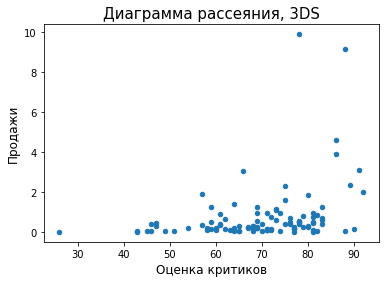

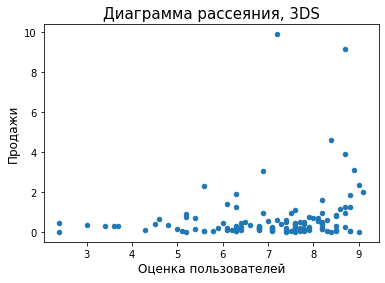

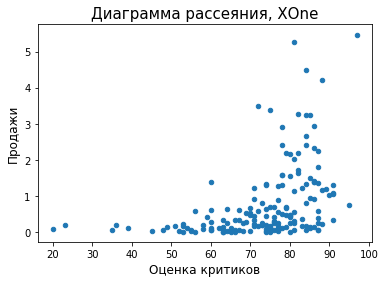

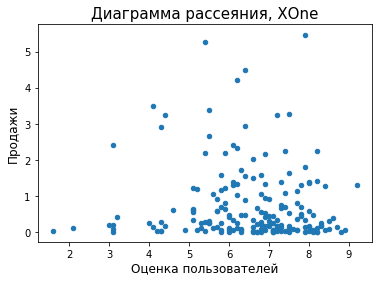

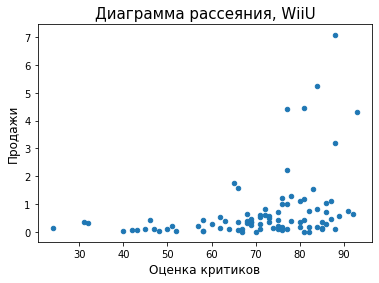

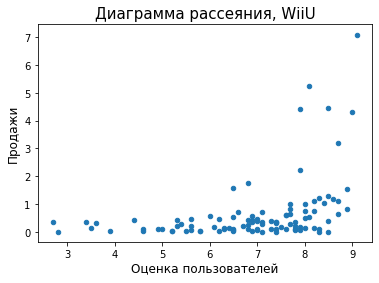

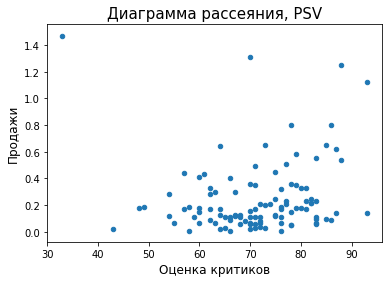

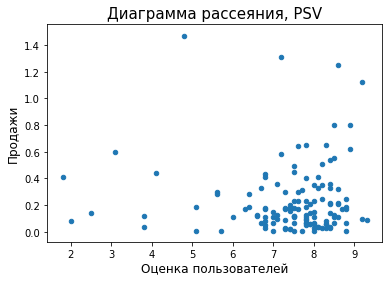

In [44]:
# создание цикла для диаграмм рассеяния для остальных платформ
for platform in pl:
    platform_leaders[platform_leaders['platform'] == platform].plot(
        x='critic_score', 
        y='sales', 
        kind='scatter')
    plt.title(f'Диаграмма рассеяния, {platform}', fontsize=15)
    plt.xlabel('Оценка критиков', fontsize=12)
    plt.ylabel('Продажи',fontsize=12);

    platform_leaders[platform_leaders['platform'] == platform].plot(
        x='user_score', 
        y='sales', 
        kind='scatter')
    plt.title(f'Диаграмма рассеяния, {platform}', fontsize=15)
    plt.xlabel('Оценка пользователей', fontsize=12)
    plt.ylabel('Продажи',fontsize=12);
    
    # расчет коэффициента корреляции 
    pl_ = platform_leaders[platform_leaders['platform'] == platform]
    display(f"{platform}.Корреляция продаж с оценкой критиков: {pl_['sales'].corr(pl_['critic_score']):.04f}")
    display(f"{platform}.Корреляция продаж с оценкой пользователей: {pl_['sales'].corr(pl_['user_score']):.04f}")

- Только у платформы **XOne** схожая с платформой **PS4** зависимость от оценки критиков (слабая) и отсутствие зависимости от оценки пользователей.  
- У платформы **3DS** слабая зависимость и от оценки критиков, и от оценки пользователей.  
- У платформы **WiiU** тоже слабая зависимость и от оценки критиков, и от оценки пользователей. Однако коэффициент корреляции продаж с оценкой пользователей выше, чем этот же коэффициент у платформы **3DS**.   
- У платформы **PSV** очень слабая зависимость от оценки критиков и практически отсутствует зависимость от оценки пользователей.  


Именно такая картина и отражена на диаграммах рассеяния.

### Общее распределение игр по жанрам

Проанализирую распределение игр по жанрам на платформах-лидерах.

In [45]:
# группировка количества игр по жанрам
genre = platform_leaders.groupby('genre')['sales'].sum()
genre

genre
Action         214.30
Adventure       17.28
Fighting        28.04
Misc            41.85
Platform        51.52
Puzzle           4.06
Racing          32.29
Role-Playing   133.78
Shooter        157.37
Simulation      22.10
Sports          92.95
Strategy         3.90
Name: sales, dtype: float64

Построю гистограмму распределения игр по жанрам.

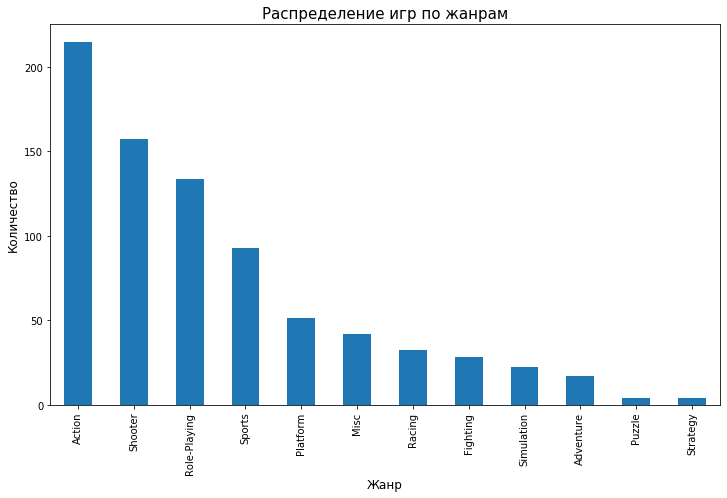

In [46]:
# построение гистограммы
genre = genre.sort_values(ascending=False) 
genre.plot(x='genre', kind='bar', figsize = (12,7))
plt.title('Распределение игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество',fontsize=12);

Посмотрю на средние и медианные значения продаж по жанрам.

In [47]:
platform_leaders.groupby('genre')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,594.00,0.36,0.85,0.01,0.03,0.11,0.31,12.62
Adventure,170.00,0.10,0.22,0.01,0.02,0.03,0.08,1.66
Fighting,53.00,0.53,1.26,0.02,0.07,0.13,0.32,7.55
Misc,124.00,0.34,0.66,0.01,0.04,0.12,0.34,4.42
Platform,61.00,0.84,1.56,0.01,0.09,0.25,1.10,9.90
Puzzle,20.00,0.20,0.33,0.01,0.02,0.07,0.11,1.19
Racing,52.00,0.62,1.12,0.01,0.05,0.24,0.68,7.09
Role-Playing,235.00,0.57,1.50,0.01,0.06,0.15,0.41,14.60
Shooter,95.00,1.66,2.28,0.01,0.15,0.68,2.23,14.63


Построю диаграммы размаха по продажам для жанров.

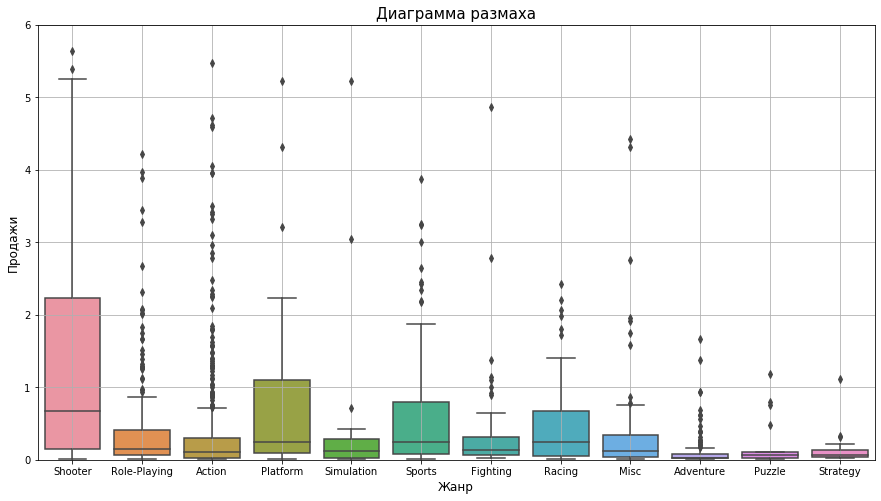

In [48]:
# построение диаграммы размаха
plt.figure(figsize=(15,8))
sns.boxplot(data=platform_leaders, x=platform_leaders['genre'], y='sales')
plt.ylim(0,6)
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.grid();

Распределение продаж практически в каждом жанре смещено в бОльшую сторону, средние значения порой намного выше медианных. Отчетливо выделяется жанр *Shooter*, его медианное значение значительно выше остальных жанров. Можно сделать вывод, что именно этот жанр является стабильным, который приносит доход не зависимо от платформы.

**Выводы**

Проанализировано количество выпускаемых игр. Наблюдается рост количества выпускаемых игр с 1994 года. Больше всего игр выпускалось с 2002 по 2011 годы. С 2012 года начался резкий спад.

Изучен жизненный цикл платформ.Продолжительность существования платформы 10-11 лет. Новые платформы появляются каждые 5-6 лет. Основные продажи игр каждой платформы происходят в течение 5-6 лет существования платформы, чаще ближе к середине жизненного цикла.

Определен актуальный период - с 2012 по 2016 годы.

Определены потенциально прибыльные платформы - **PS4, XOne**, **WiiU**, **3DS** и **PSV**.

Построены диаграммы рассеяния для потенциально прибыльных платформ. Распределение по продажам по всем платформам очень сильно скошено в бОльшую сторону.

Рассмотрена зависимость продаж игр платформы **PS4** от оценки критиков и пользователей. Обнаружены слабая зависимость от оценки критиков и отсутствие зависимости от оценки пользователей.

Проведен подобный анализ по остальным платформам. 

Изучено распределение игр по жанрам. Самым стабильным жанром, приносящим доход, является жанр *Shooter*.

[в начало](#start1)

## Портрет пользователя каждого региона

Составлю портрет пользователя для каждого их следующих регионов:
- Северная Америка
- Европа
- Япония  

### ТОП5 популярных платформ

Сохраню в новую переменную сводную таблицу с данными по продажам по всем платформам с разбивкой по регионам.

In [49]:
# создание сводной таблицы
region_pl = df_forecast.pivot_table(index='platform',  
               values=('na_sales', 'eu_sales', 'jp_sales'), 
               aggfunc='sum'
              )
region_pl

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


На основе сводной таблицы построю круговые диаграммы с пятью самыми популярными платформами в каждом регионе. Для этого автоматизирую процесс - напишу функцию построения круговой диаграммы.

In [50]:
# создание функции для построения круговой диаграммы
def create_pie (col, title, xlabel):
    platform_pie = col.sort_values(ascending=False)[:5].plot(kind='pie', autopct='%1.1f%%')
    plt.title(title, fontsize=15)
    plt.ylabel('')
    plt.xlabel(xlabel, fontsize=12)
    plt.legend(bbox_to_anchor = (1, 0.65, 0.25, 0.25))
    return platform_pie

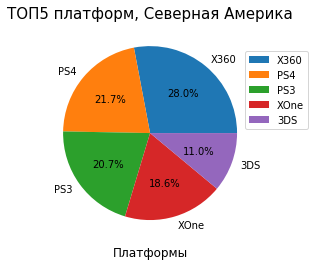

In [51]:
# построение круговой диаграммы
create_pie(region_pl['na_sales'], 'ТОП5 платформ, Северная Америка', 'Платформы');

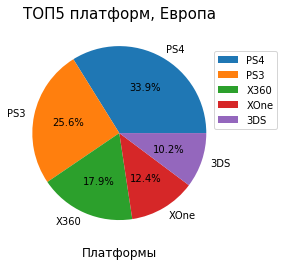

In [52]:
# построение круговой диаграммы
create_pie(region_pl['eu_sales'], 'ТОП5 платформ, Европа', 'Платформы');

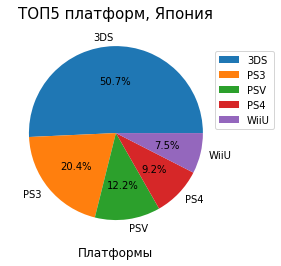

In [53]:
# построение круговой диаграммы
create_pie(region_pl['jp_sales'], 'ТОП5 платформ, Япония', 'Платформы');

Лидеры продаж во всех регионах разные: 
- Северная Америка - X360
- Европа - PS4
- Япония - 3DS.   

В Северной Америке и Европе популярны одни и те же платформы - X360, Wii, PS3, DS и PS4. В Японии пользуются популярностью 4 платформы из списка ТОП5 Европы и Северной Америке, но платформа-лидер в Японии 3DS непопулярна в С.Америке и Европе.

### ТОП5 популярных жанров

Сохраню в новую переменную сводную таблицу с данными по жанрам с разбивкой по регионам.

In [54]:
# создание сводной таблицы
region_games = df_forecast.pivot_table(index='genre',  
               values=('na_sales', 'eu_sales', 'jp_sales'), 
               aggfunc='sum'
              )
region_games

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


На основе сводной таблицы построю круговые диаграммы с пятью самыми популярными жанрами игр в каждом регионе с помощью функции **`create_pie`**.

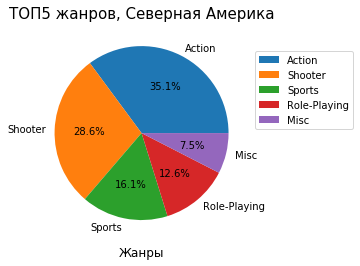

In [55]:
# построение круговой диаграммы
create_pie(region_games['na_sales'], 'ТОП5 жанров, Северная Америка', 'Жанры');

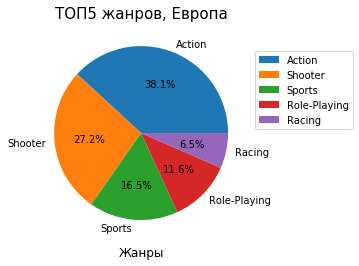

In [56]:
# построение круговой диаграммы
create_pie(region_games['eu_sales'], 'ТОП5 жанров, Европа', 'Жанры');

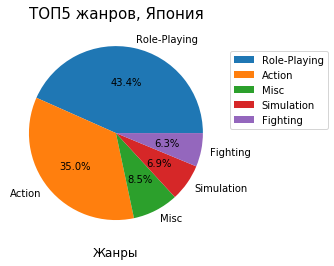

In [57]:
# построение круговой диаграммы
create_pie(region_games['jp_sales'], 'ТОП5 жанров, Япония', 'Жанры');

В Северной Америке и Европе совпадают ТОП4 жанра: Action, Shoter, Sports и Role-Playing . На 5м месте в Северной Америке - жанр Misc, в Европе - Racing.  
В Японии лидирует жанр Role-Playing, на втором месте - Action, меньшей популярностью пользуются жанры Misc, Simulation и Fighting.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Сохраню в новую переменную сводную таблицу с данными по жанрам с разбивкой по регионам.

In [58]:
# создание сводной таблицы
esrb = df_forecast.pivot_table(index='rating',  
               values=('na_sales', 'eu_sales', 'jp_sales'), 
               aggfunc='sum'
              )
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
missing,91.50,108.84,103.31


In [59]:
# Комментарий ревьюера
display(df_forecast.shape, df_forecast.isna().sum())
df_forecast['rating'].value_counts(), df_forecast['rating'].unique()

(2886, 12)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating                0
sales                 0
dtype: int64

(missing    1275
 M           498
 T           412
 E           395
 E10+        306
 Name: rating, dtype: int64,
 array(['M', 'missing', 'E', 'E10+', 'T'], dtype=object))

Построю графики по каждому региону.

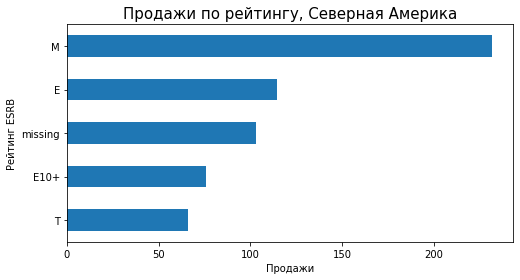

In [60]:
esrb_na = esrb['na_sales'].sort_values(ascending=True) 
esrb_na.plot(
    kind='barh',
    x='na_sales', 
    y='rating', 
    figsize=(8,4))
plt.title('Продажи по рейтингу, Северная Америка', fontsize=15)
plt.ylabel('Рейтинг ESRB')
plt.xlabel('Продажи'); 

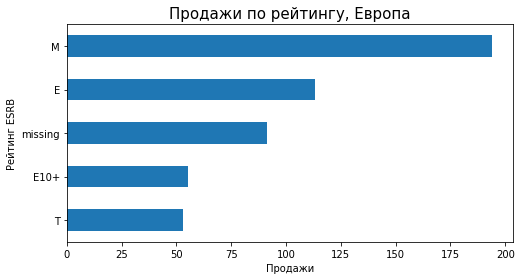

In [61]:
esrb_eu = esrb['eu_sales'].sort_values(ascending=True) 
esrb_eu.plot(
    kind='barh',
    x='na_sales', 
    y='rating', 
    figsize=(8,4))
plt.title('Продажи по рейтингу, Европа', fontsize=15)
plt.ylabel('Рейтинг ESRB')
plt.xlabel('Продажи'); 

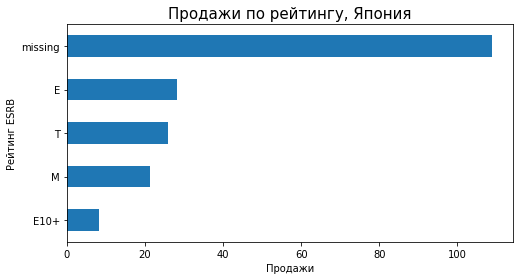

In [62]:
esrb_jp = esrb['jp_sales'].sort_values(ascending=True) 
esrb_jp.plot(
    kind='barh',
    x='na_sales', 
    y='rating', 
    figsize=(8,4))
plt.title('Продажи по рейтингу, Япония', fontsize=15)
plt.ylabel('Рейтинг ESRB')
plt.xlabel('Продажи'); 

В Северной Америке и Европе лучше всего продаются игры с рейтингом Е (для всех возрастов) и М (для взрослых), далее идут игры без рейтинга, потом уже с рейтингом Т (для подростков) и Е10+ (от 10 лет).  
В Японии лидеры продаж с огромным отрывом - игры без рейтинга, лишь потом игры с рейтингом Е (для всех возрастов) и Т (для подростков), далее идут игры с рейтингом М (для взрослых) и Е10+ (от 10 лет).  

Благодаря проведеным в п.4 исследованиям прояснился портрет пользователя каждого региона:

In [63]:
# создание таблицы с портретами пользователей по регионам
portrait = pd.DataFrame({
    'регион':('Северная Америка', 'Европа', 'Япония'),
    'платформы':(('X360', 'PS4', 'PS3', 'XOne', '3DS'), 
                 ('PS4', 'PS3', 'X360', 'XOne', '3DS'),
                 ('3DS', 'PS3', 'PSV', 'PS4', 'WiiU')),
    'жанры':(('Action', 'Shoter', 'Sports', 'Role-Playing', 'Misc'),
            ('Action', 'Shoter', 'Sports', 'Role-Playing', 'Racing'),
            ('Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting')),
    'рейтинг_ESRB':(('M','E','missing','E10+','T'),
            ('E','M','missing','E10+','T'),
            ('missing','E','T','M','E10+'))
})
portrait

,регион,платформы,жанры,рейтинг_ESRB
0,Северная Америка,"(X360, PS4, PS3, XOne, 3DS)","(Action, Shoter, Sports, Role-Playing, Misc)","(M, E, missing, E10+, T)"
1,Европа,"(PS4, PS3, X360, XOne, 3DS)","(Action, Shoter, Sports, Role-Playing, Racing)","(E, M, missing, E10+, T)"
2,Япония,"(3DS, PS3, PSV, PS4, WiiU)","(Role-Playing, Action, Misc, Simulation, Fight...","(missing, E, T, M, E10+)"


**Выводы**

Лидеры продаж по платформам во всех регионах разные:

- Северная Америка - X360
- Европа - PS4
- Япония - DS.  

В Северной Америке и Европе популярны одни и те же платформы - X360, Wii, PS3, DS и PS4. В Японии пользуются популярностью 4 платформы из списка ТОП5 Европы и Северной Америке, но платформа-лидер в Японии 3DS непопулярна в С.Америке и Европе.

В Северной Америке и Европе совпадают ТОП4 жанра: Action, Shoter, Sports и Role-Playing . На 5м месте в Северной Америке - жанр Misc, в Европе - Racing.  
В Японии лидирует жанр Role-Playing, на втором месте - Action, меньшей популярностью пользуются жанры Misc, Simulation и Fighting.

В Северной Америке и Европе лучше всего продаются игры с рейтингом Е (для всех возрастов) и М (для взрослых), далее идут игры без рейтинга, потом уже с рейтингом Т (для подростков) и Е10+ (от 10 лет).  
В Японии лидеры продаж с огромным отрывом - игры без рейтинга, лишь потом игры с рейтингом Е (для всех возрастов) и Т (для подростков), далее идут игры с рейтингом М (для взрослых) и Е10+ (от 10 лет). 
Можно сделать вывод о том, что рейтинг ESRB влияет на продажи в Северной Америке и Европе. Поскольку в Японии основные продажи приходятся на платформы без рейтинга ESRB, данный рейтинг не влияет на продажи. 

[в начало](#start1)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для сравнения данных о средних пользовательских рейтинах сформулирую нулевую и альтернативную гипотезы. 

Нулевая гипотеза H₀:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза H₁:  
Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Сделаю выборку из таблицы с играми, имеющими оценку пользователей (без пропущенных значений).

In [64]:
user_score = df_forecast.dropna(subset=['user_score'])
user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,nan,6.60,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.00,8.50,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,nan,5.10,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,missing,0.01


Построю гистограмму распределения пользовательских рейтингов.

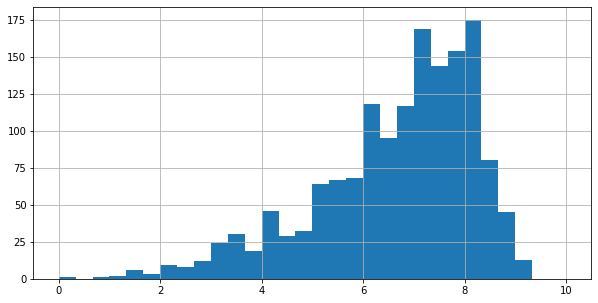

In [65]:
# построение гистограммы распределения
user_score['user_score'].hist(bins=30, 
    range = (0,10), 
    figsize = (10, 5));

Распределение пользовательских рейтингов склонно к нормальному, имеется скос в сторону меньших значений.  


Применю *t-тест* для выборок по каждой платформе. Поскольку указанные выборки независимы, укажу *equal_var = False*. Задам значение alpha = .05

In [66]:
# рассчет p-критерия
results = st.ttest_ind(user_score[user_score['platform'] == 'XOne']['user_score'],\
                       user_score[user_score['platform'] == 'PC']['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

p-значение:  0.5489537965134912


In [67]:
# сравнение p-значения со значением alpha
alpha = .05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное p-значение говорит о том, что вероятность получить случайно найденное различие между средними пользовательскими рейтингами платформ Xbox One и PC и при условии, что нулевая гипотеза верна, велика.  
Выбранный критерий значимости был превышен. Следовательно, делаю вывод о том, что не получилось отвергнуть нулевую гипотезу.   

### Средние пользовательские рейтинги жанров Action и Sports разные.

Для сравнения данных о средних пользовательских рейтинах жанров Action и Sports сформулирую нулевую и альтернативную гипотезы. 

Нулевая гипотеза H₀:  
Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H₁:  
Средние пользовательские рейтинги жанров Action и Sports разные.

Применю *t-тест* для выборок по каждому жанру. Поскольку указанные выборки независимы, укажу *equal_var = False*.  
Для теста использую таблицу с играми, имеющими оценку пользователей (без пропущенных значений).  
Задам значение alpha = .05

In [68]:
# рассчет p-критерия
results = st.ttest_ind(user_score[user_score['genre'] == 'Action']['user_score'],\
                       user_score[user_score['genre'] == 'Sports']['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

p-значение:  4.24307776572644e-20


In [69]:
# сравнение p-значения со значением alpha
alpha = .05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Полученное p-значение говорит о том, что вероятность получить случайно найденное различие между средними пользовательскими рейтингами жанров Action и Sports при условии, что нулевая гипотеза верна, крайне мала (стремиться к нулю).
Выбранный критерий значимости не был превышен. Следовательно, делаю вывод о том, что данные о средних пользовательских рейтингах жанров Action и Sports противоречат нулевой гипотезе, следовательно, рейтинги разные.  

Посмотрю, у какого из двух жанров пользовательский рейтинг выше. Для этого создам сводную таблицу со средними рейтингами жанров.

In [70]:
# создание сводной таблицы
score = user_score.pivot_table(
    index = 'genre', 
    values = 'user_score', 
    aggfunc = 'mean'
)
score

,user_score
genre,
Action,6.83
Adventure,7.47
Fighting,6.90
Misc,6.94
Platform,6.81
Puzzle,7.63
Racing,6.15
Role-Playing,7.26
Shooter,6.44


Средний пользовательский рейтинг жанра Action (6.83) выше, чем у жанра Sports (5.46).

**Выводы**

Проведенный t-тест позволил:

- подтвердить нулевую гипотезу об одинаковых средних пользовательских рейтингах платформ Xbox One и PC. 

- опровергунуть нулевую гипотезу об отсутствии отличия между средними пользовательскими рейтинги жанрами Action и Sports.

[в начало](#start1)

## Итоги исследования

По итогам проведенного анализа можно спрогнозировать потенциально популярный продукт в 2017 году:

- Игровые платформы: PS4, XOne, WiiU, 3DS и PSV. 
- Игровой жанр: *Shooter*.

Рассмотрена зависимость продаж игр от оценки критиков и пользователей:

- Обнаружены слабая зависимость от оценки критиков и отсутствие зависимости от оценки пользователей у платформ PS4 и XOne.
- У платформы 3DS слабая зависимость и от оценки критиков, и от оценки пользователей.
- У платформы WiiU тоже слабая зависимость и от оценки критиков, и от оценки пользователей. Однако коэффициент корреляции продаж с оценкой пользователей выше, чем этот же коэффициент у платформы 3DS.
- У платформы PSV очень слабая зависимость от оценки критиков и практически отсутствует зависимость от оценки пользователей.

Лидеры продаж по платформам во всех регионах разные: Северная Америка - X360, Европа - PS3, Япония - DS и 3DS.  В Северной Америке и Европе популярны одни и те же платформы - X360, Wii, PS3, DS и PS4. В Японии иная картина: здесь более популярны платформы DS, 3DS, PS3, PSP и Wii. Платформы Wii, PS3 и DS популярны во всех регионах.

В Северной Америке и Европе популярны одни и те же платформы - X360, Wii, PS3, DS и PS4. В Японии пользуются популярностью 4 платформы из списка ТОП5 Европы и Северной Америке, но платформа-лидер в Японии 3DS непопулярна в С.Америке и Европе.

В Северной Америке и Европе совпадают ТОП4 жанра: Action, Shoter, Sports и Role-Playing . На 5м месте в Северной Америке - жанр Misc, в Европе - Racing.
В Японии лидирует жанр Role-Playing, на втором месте - Action, меньшей популярностью пользуются жанры Misc, Simulation и Fighting.

Рейтинг ESRB влияет на продажи в Северной Америке и Европе. В Японии данный рейтинг не влияет на продажи. 

Подтверждена гипотеза:  

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Подтверждена гипотеза: 

- Средние пользовательские рейтинги жанров Action и Sports  разные.

[в начало](#start1)